In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

Used Parameters

Model Setup

In [18]:
## Derivatives:

# Susceptible equation
def dS_dt(S, I, N, mu, beta):
    outflow_exposed = beta * I * S
    inflow_demography = mu * N 
    outflow_demography = mu * S
    return -outflow_exposed + inflow_demography - outflow_demography

# Exposed equation
def dE_dt(S, E, I, mu, delta):
    inflow_susceptible = beta * I * S
    outflow_infected = delta * E
    outflow_demography = mu * E
    return inflow_susceptible - outflow_infected - outflow_demography

# Infected equation
def dI_dt(I, E, mu, gamma, delta):
    inflow_exposed = delta * E
    outflow_recovered = gamma * I
    outflow_demography = mu * I
    return inflow_exposed - outflow_recovered - outflow_demography

# Recovered equation
def dR_dt(I, R, mu, gamma):
    inflow_infected = gamma * I
    outflow_demography = mu * R
    return inflow_infected - outflow_demography



In [22]:
## Model:
def SEIR_model(t, y, mu, beta, delta, gamma):
    """
    : param t: Time step for solve_ivp
    : param y: Previous solution or initial values
    ...
    : return:
    """
    
    S, E, I, R = y
    
    S_out = dS_dt(S, I, N, mu, beta)
    E_out = dE_dt(S, E, I, mu, delta)
    I_out = dI_dt(I, E, mu, gamma, delta)
    R_out = dR_dt(I, R, mu, gamma)
    
    return [S_out, E_out, I_out, R_out]
    
    
    

In [25]:
def plot_model(solution, title='SEIR model'):
    sus, exp, inf, rec = solution.y
    
    cases = inf

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(title)
    
    ax1.plot(sus, 'tab:blue', label='Susceptible');
    ax1.plot(exp, 'tab:orange', label='Exposed');
    ax1.plot(inf, 'tab:red', label='Infected');
    ax1.plot(rec, 'tab:green', label='Recovered');
    
    ax1.set_xlabel("Days", fontsize=10);
    ax1.set_ylabel("Fraction of population", fontsize=10);
    ax1.legend(loc='best');
    
    ax2.plot(cases, 'tab:red', label='Cases');    
    ax2.set_xlabel("Days", fontsize=10);
    ax2.set_ylabel("Fraction of population (Cases)", fontsize=10, color='tab:red');

Model without intervention

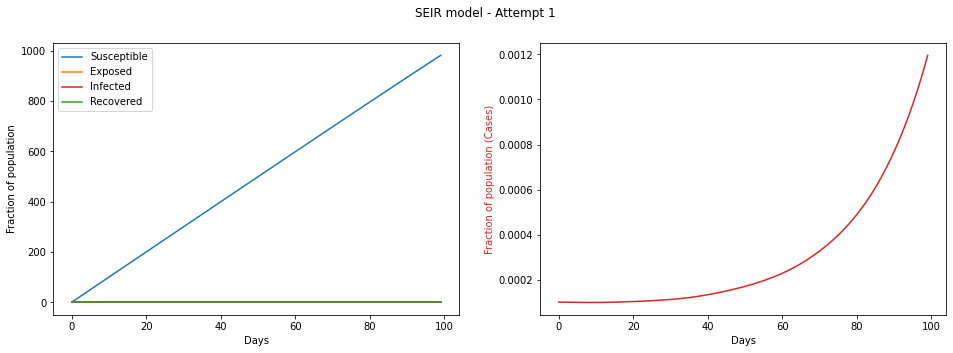

In [26]:
N = 100000  # Population size
n_infected = 10
max_days = 100

# State at time = 0 for SEIR model
# The numbers correspond to the number of people in each of the SEIR compartments
initial_state = [(N - n_infected)/ N, 0, n_infected / N, 0]

beta = 10 ** -4
delta = 1/4
gamma = 1/14
mu = 1/365

args = (beta, delta, gamma, mu)

sol = solve_ivp(SEIR_model, [0, max_days], initial_state, args=args, t_eval=np.arange(max_days))

plot_model(sol, 'SEIR model - Attempt 1')


scipy.integrate._ivp.ivp.OdeResult